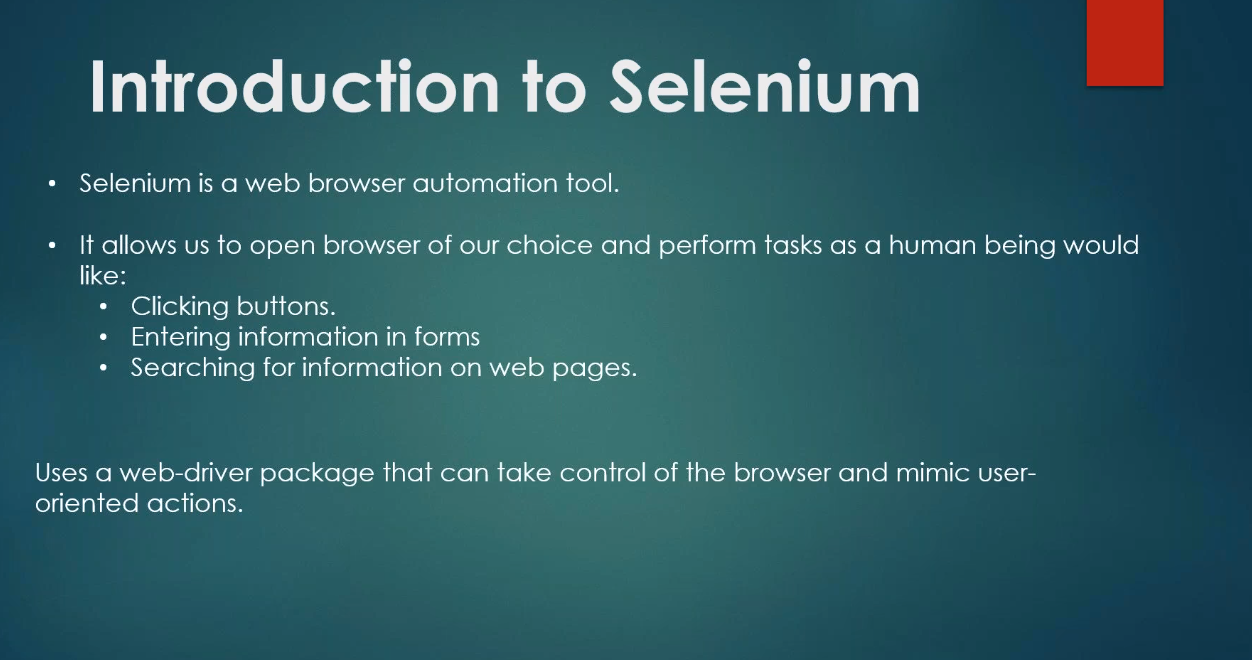

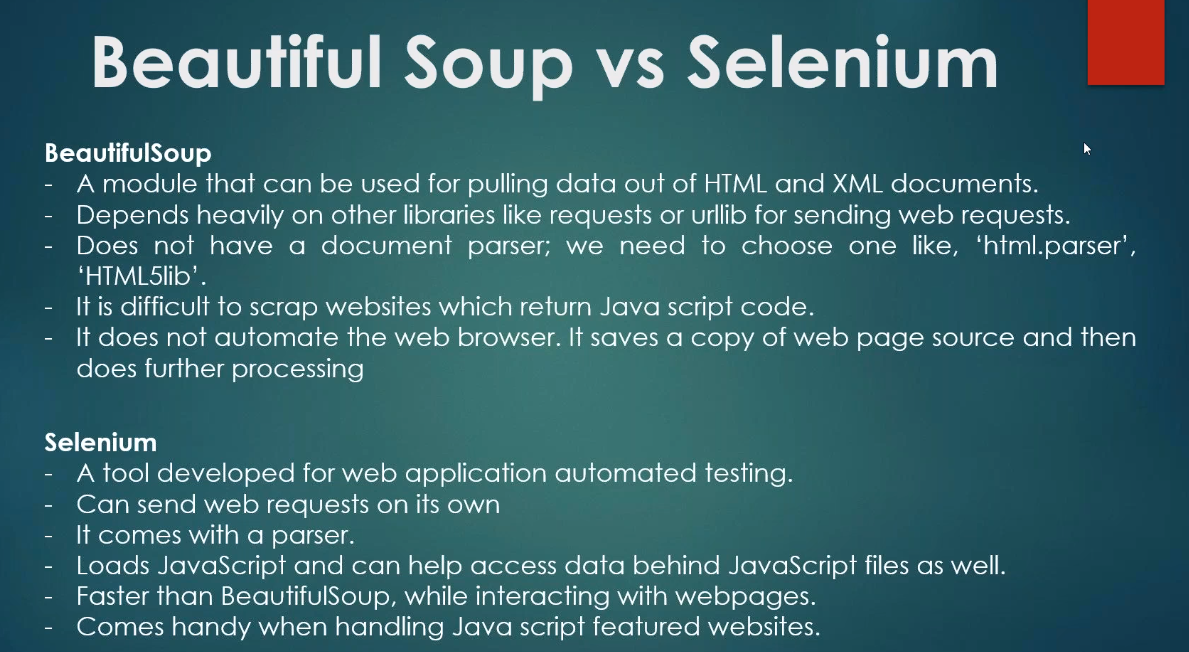

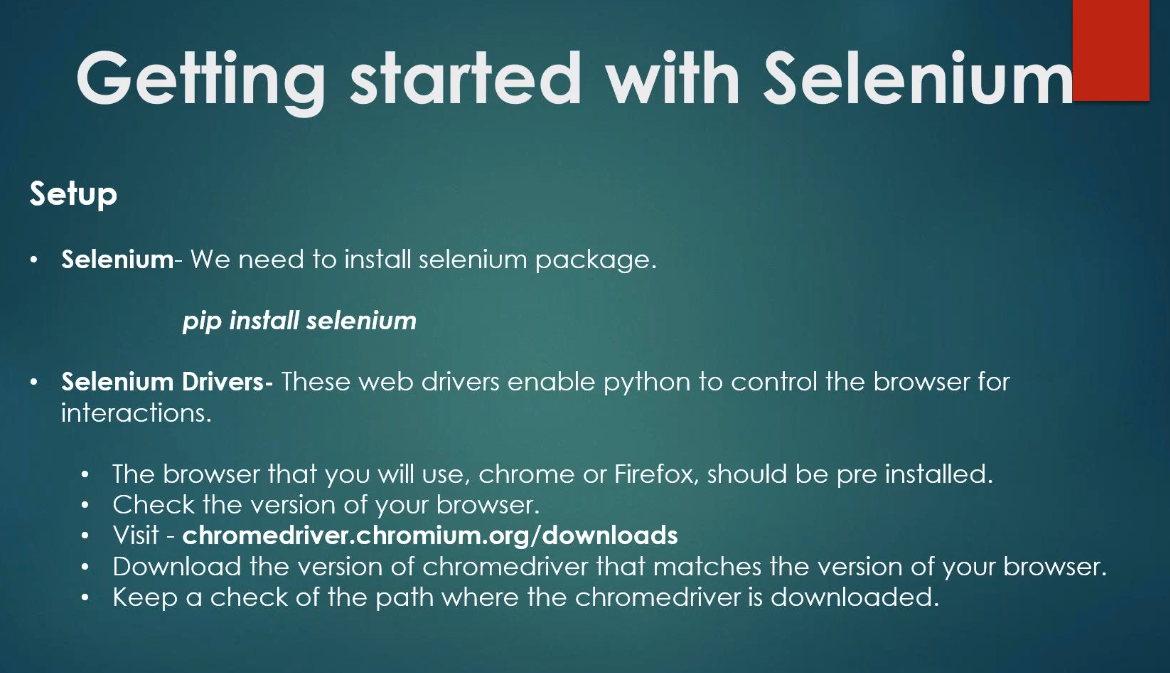

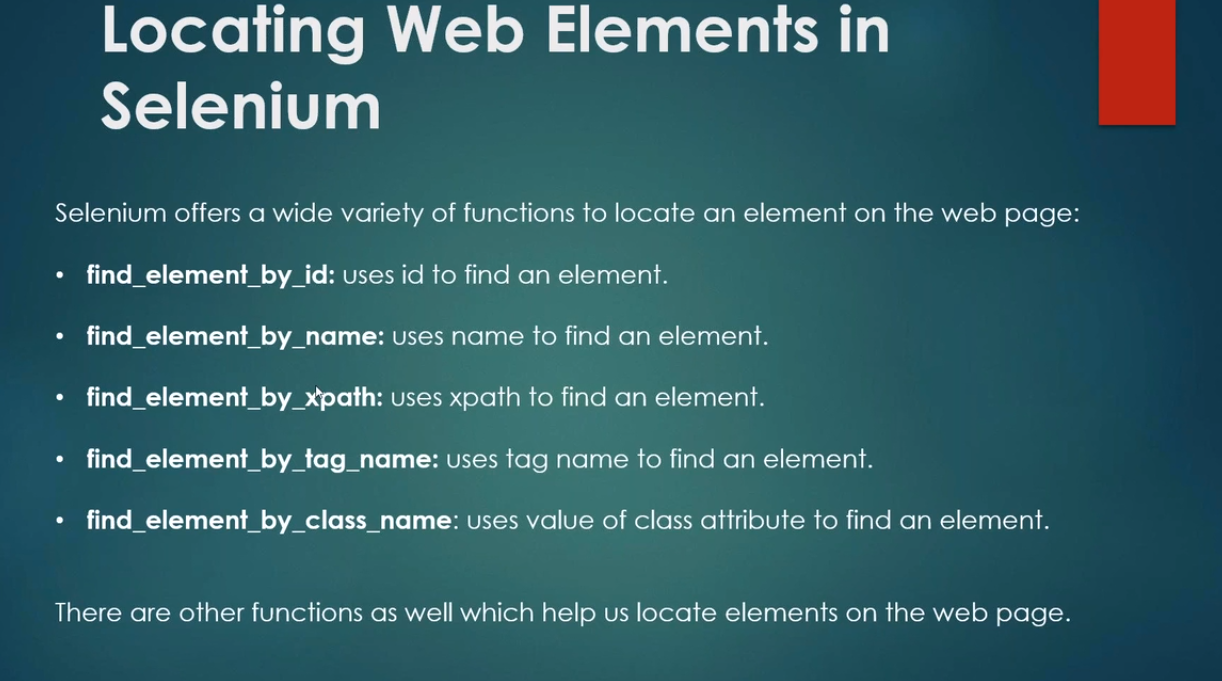

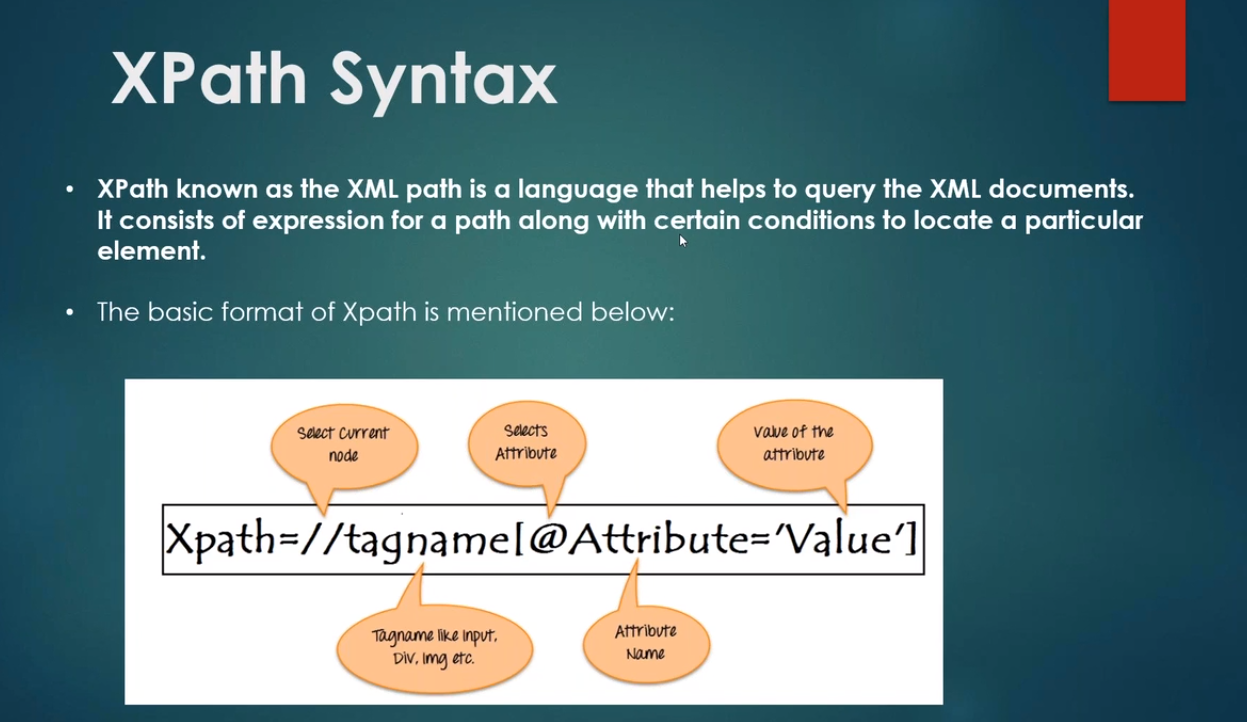

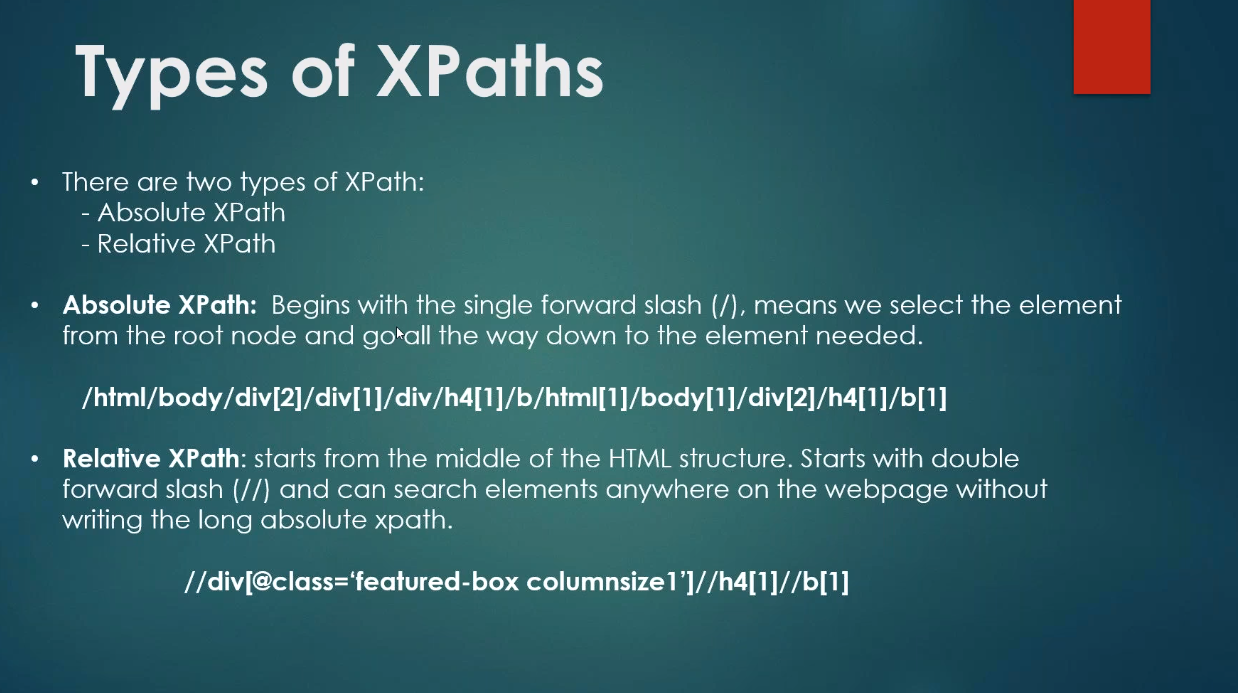

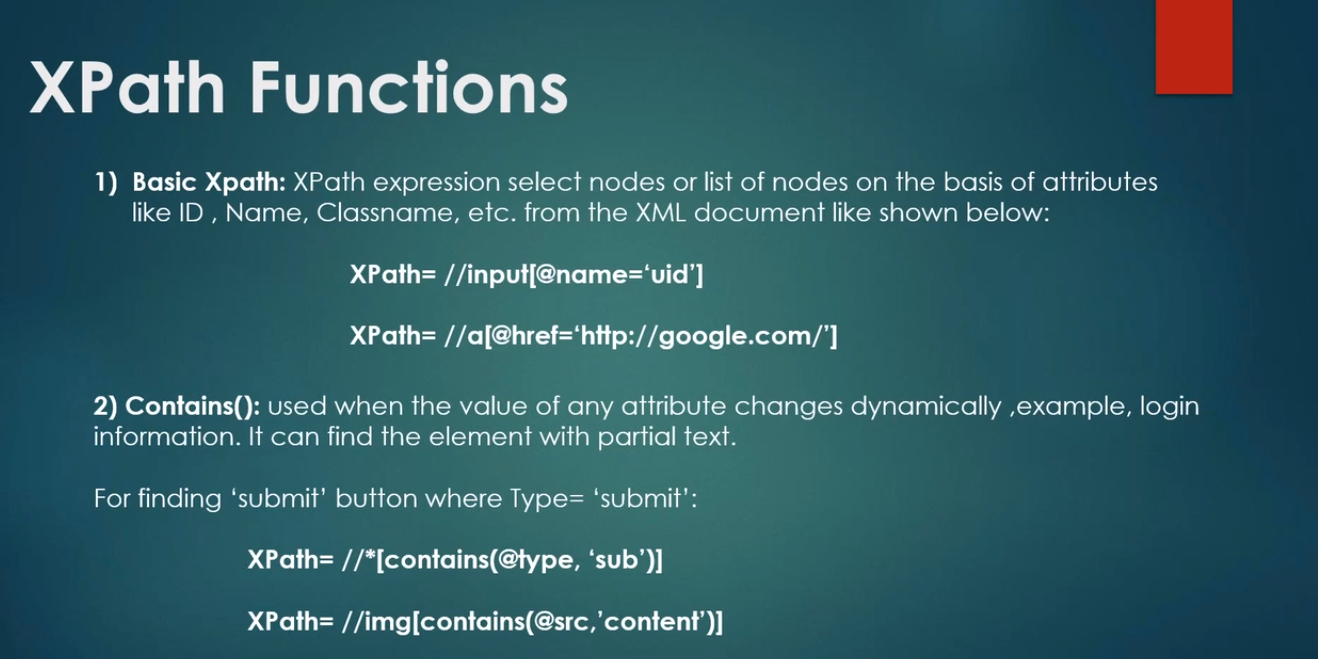

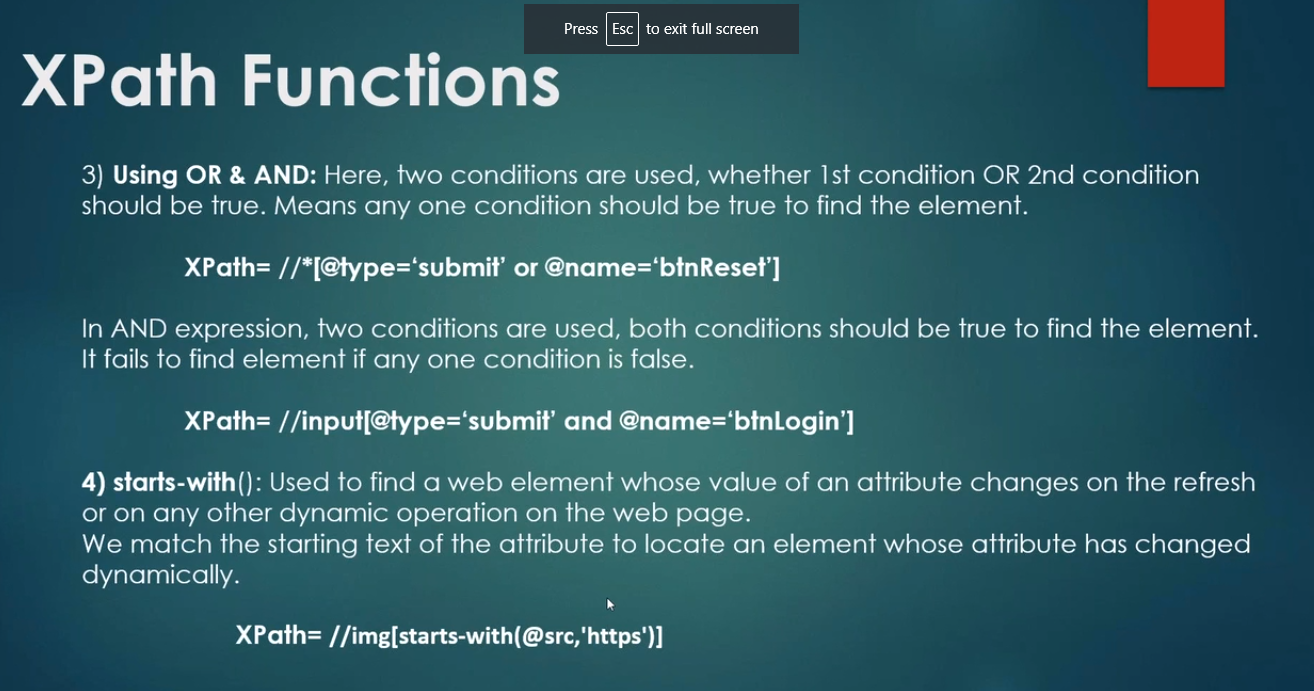

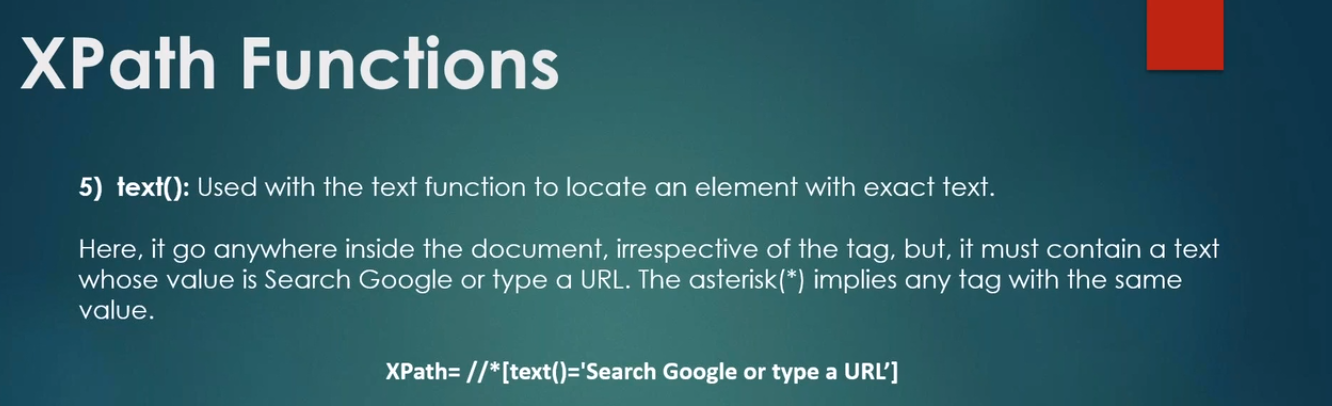

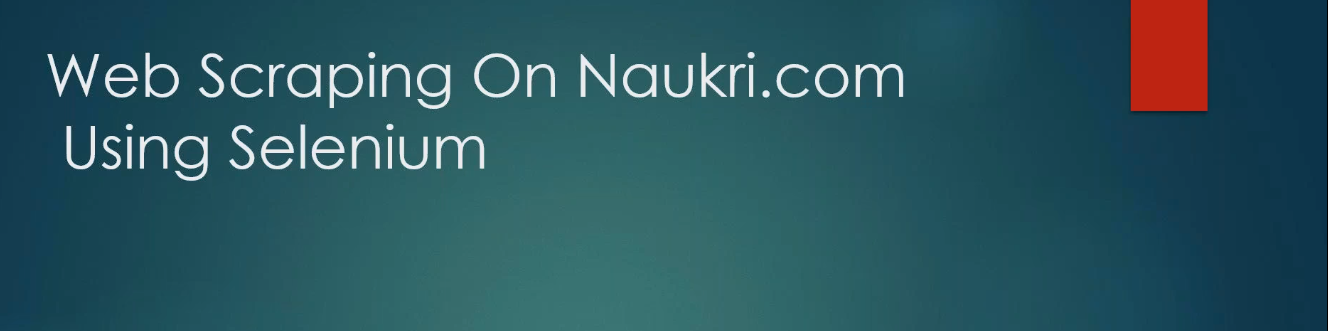

In [1]:
!pip install selenium

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException ,NoSuchElementException
from selenium.webdriver.common.by import By
import time

Now we will download the webDriver for the Web Browser.Step for download are - 1.Check The version of your browser 2. go to the link https://chromedriver.chromium.org/downloads 3.Download the webdriver for your version of your browser.

In [3]:
# Let's first connect to the driver-

driver = webdriver.Chrome(r"chromedriver.exe")

In [4]:
# Opening the naukri.com page on automated chrome browser

driver.get("https://www.naukri.com/")

In [5]:
# Entering designation and location as required in the question-

designation = driver.find_element(By.CLASS_NAME,"suggestor-input ")
designation.send_keys("Data Analyst")

In [6]:
location = driver.find_element(By.XPATH,"/html/body/div[1]/div[7]/div/div/div[5]/div/div/div/div[1]/div/input")
location.send_keys("Bangalore")

In [7]:
search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

In [8]:
job_title=[]
job_location= []
company_name=[]
experience_required=[]
salary_required=[]

In [9]:
# scraping job title from the given page

title_tags = driver.find_elements(By.XPATH,'//a[@class= "title ellipsis"]')
for i in title_tags[0:10]:
    title = i.text
    job_title.append(title)
    
    
    
# scraping job location from the given page

location_tags = driver.find_elements(By.XPATH,'//span[@class= "ellipsis fleft locWdth"]')
for i in location_tags[0:10]:
    location = i.text
    job_location.append(location)
    
    
    
    
# scraping Company name from the given page

company_tags = driver.find_elements(By.XPATH,'//a[@class= "subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company = i.text
    company_name.append(company)
    
    
    
    
    
# scraping Experience from the given page

experience_tags = driver.find_elements(By.XPATH,'//span[@class= "ellipsis fleft expwdth"]')
for i in experience_tags[0:10]:
    exp = i.text
    experience_required.append(exp)
    
    
    
    
    
# scraping Salaries from the given page

salary_tags = driver.find_elements(By.XPATH,'//span[@class= "ellipsis fleft "]')
for i in salary_tags[0:10]:
    salary = i.text
    salary_required.append(salary)

In [10]:
print(len(job_title),len(job_location),len(company_name),len(experience_required),len(salary_required))

10 10 10 10 10


In [11]:
# making dataframe



import pandas as pd


data=pd.DataFrame() 
data["Title"] =job_title
data['Location'] =job_location
data['Company_Name'] = company_name
data['Experience '] =experience_required
data['Salary ']=salary_required
data



Title  \
0                       Data Analyst   
1                       Data Analyst   
2  Procurement Analyst/ Data Analyst   
3             Data Analyst - FinTech   
4                 STAFF DATA ANALYST   
5                       Data Analyst   
6                       Data Analyst   
7                       Data analyst   
8   Data Analyst - IIT/BITS/Startups   
9                       Data Analyst   

                                            Location  \
0                   Bangalore/Bengaluru(Anepalya +1)   
1                    Bangalore/ Bengaluru, Karnataka   
2      Bangalore/ Bengaluru, Karnataka(Rajaji Nagar)   
3  Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...   
4                                Bangalore/Bengaluru   
5        Bangalore/ Bengaluru, Karnataka(HSR Layout)   
6                                Bangalore/Bengaluru   
7                                Bangalore/Bengaluru   
8                                Bangalore/Bengaluru   
9               Bangalore/Bengaluru(Electronic City)   

               Company_Name Experience           Salary   
0               Eastvantage     4-7 Yrs     8-11 Lacs PA  
1  Mensa Brand Technologies     1-2 Yrs      6-9 Lacs PA  
2        Bloom Energy India     6-7 Yrs    Not disclosed  
3              Primo Hiring     1-2 Yrs    Not disclosed  
4                   Walmart    1-14 Yrs    Not disclosed  
5          Anakin Skywalker     0-3 Yrs  2.5-3.5 Lacs PA  
6        DAT Solutions, Llc     2-3 Yrs    Not disclosed  
7             Multi Recruit     3-5 Yrs     8-10 Lacs PA  
8              AVE Promagne     1-5 Yrs    Not disclosed  
9       Hiringhut Solutions     5-7 Yrs    Not disclosed

In [12]:
# fetch the url
url =driver.find_elements(By.XPATH,'//a[@class="title ellipsis"]')
url[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="a8407276eb9fcf759cdc0dda89d0b60e", element="E7CCEE7E26C72DF3D921CED6F4CC365D_element_249")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8407276eb9fcf759cdc0dda89d0b60e", element="E7CCEE7E26C72DF3D921CED6F4CC365D_element_250")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8407276eb9fcf759cdc0dda89d0b60e", element="E7CCEE7E26C72DF3D921CED6F4CC365D_element_251")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8407276eb9fcf759cdc0dda89d0b60e", element="E7CCEE7E26C72DF3D921CED6F4CC365D_element_252")>]

In [13]:
for i in url[0:4]:       # Let's provide range to print only top 4 data 
    print(i.get_attribute('href'))

https://www.naukri.com/job-listings-data-analyst-eastvantage-bangalore-bengaluru-4-to-7-years-300623004975
https://www.naukri.com/job-listings-data-analyst-mensa-brand-technologies-bangalore-bengaluru-karnataka-1-to-2-years-270623006488
https://www.naukri.com/job-listings-procurement-analyst-data-analyst-bloom-energy-india-bangalore-bengaluru-karnataka-6-to-7-years-260623003583
https://www.naukri.com/job-listings-data-analyst-fintech-primo-hiring-mumbai-hyderabad-secunderabad-pune-ahmedabad-chennai-bangalore-bengaluru-delhi-ncr-1-to-2-years-040523907838


In [14]:
job_titles = []


In [15]:
start = 0
end =2

for page in range(start,end):
    titles= driver.find_elements(By.XPATH,'//a[@class="title ellipsis"]')
    for i in titles:
        job_titles.append(i.text)
    next_button=driver.find_element(By.XPATH,'//a[@class="fright fs14 btn-secondary br2"]')
    next_button.click()
    time.sleep(3)

In [16]:
len(job_titles)

40

In [17]:
job_titles

['Data Analyst',
 'Data Analyst',
 'Procurement Analyst/ Data Analyst',
 'Data Analyst - FinTech',
 'STAFF DATA ANALYST',
 'Data Analyst',
 'Data Analyst',
 'Data analyst',
 'Data Analyst - IIT/BITS/Startups',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst For Bangalore Location',
 'Data Analyst',
 'Data Analyst',
 'Staff Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Staff Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'DATA ANALYST III',
 'Data Analyst - FinTech',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Tibco EBX Analyst/Architect - Data Modeling',
 'SOC Data Analyst',
 'Data Analyst (Bangalore)',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'data analyst',
 'Data Analyst IV',
 'Data Analyst',
 'Data Analyst - Java/Python',
 'Data Analyst']

In [18]:
driver.close()